In [1]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/avhadutgadhave/MLOP-s-POC-AWS/master/iris.csv',
names=['sepal_length','sepal_width','petal_length','petal_width','species'])
data.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


FileNotFoundError: [Errno 2] No such file or directory: 'static/mat.png'

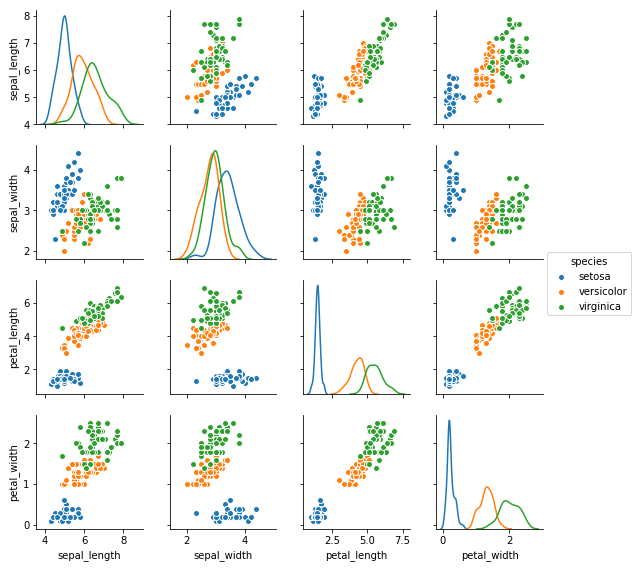

In [3]:
plotfile=seaborn.pairplot(data, hue="species", size=2, diag_kind="kde")
plotfile.savefig('static/mat.png')

In [4]:
from sklearn.preprocessing import LabelBinarizer
species_lb = LabelBinarizer()
Y = species_lb.fit_transform(data.species.values)
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [5]:
from sklearn.preprocessing import normalize
FEATURES = data.columns[0:4]
X_data = data[FEATURES].as_matrix()
X_data = normalize(X_data)
X_data

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.3, random_state=1)
X_train.shape

(105, 4)

In [7]:
import tensorflow as tf
# Parameters
learning_rate = 0.01
training_epochs = 15

In [8]:
# Neural Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 128 # 1st layer number of neurons
n_input = X_train.shape[1] # input shape (105, 4)
n_classes = y_train.shape[1] # classes to predict

In [9]:
# Inputs
X = tf.placeholder("float", shape=[None, n_input])
y = tf.placeholder("float", shape=[None, n_classes])
# Dictionary of Weights and Biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [11]:
    # Model Forward Propagation step
    def forward_propagation(x):
        # Hidden layer1
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)
        
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2)
        # Output fully connected layer
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] 
        return out_layer
    # Model Outputs
    yhat = forward_propagation(X)
    ypredict = tf.argmax(yhat, axis=1)

In [12]:
    # Backward propagation
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [13]:
    # Initializing the variables
    init = tf.global_variables_initializer()
    from datetime import datetime
    startTime = datetime.now()
    with tf.Session() as sess:
        sess.run(init)
        f=open('accuracy.txt','r+')
        f.truncate(0)
        f=open('accuracy.txt','a+')
        #writer.add_graph(sess.graph)
        #EPOCHS
        for epoch in range(training_epochs):
            #Stochasting Gradient Descent
            for i in range(len(X_train)):
                summary = sess.run(train_op, feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})
            
            train_accuracy = np.mean(np.argmax(y_train, axis=1) == sess.run(ypredict, feed_dict={X: X_train, y: y_train}))
            test_accuracy  = np.mean(np.argmax(y_test, axis=1) == sess.run(ypredict, feed_dict={X: X_test, y: y_test}))
                    
            f.write("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
            f.write('\n')
            #print("Epoch = %d, train accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy))
        sess.close()
        f.close()
    print("Time taken:", datetime.now() - startTime)

Time taken: 0:00:01.969171


In [14]:
# preprocess the data
species={'setosa':0,'versicolor':1,'virginica':2}
data.species=[species[item] for item in data.species]
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [15]:
df = pd.DataFrame(data) 
fun=df[['sepal_length','sepal_width','petal_length','petal_width']]

cls=df[['species']]

In [16]:
X1_train, X1_test,y1_train, y1_test  = train_test_split(fun,cls, test_size=0.3, random_state=1)

X1_train=X1_train.reset_index(drop=True)
X1_test=X1_test.reset_index(drop=True)
y1_train=y1_train.reset_index(drop=True)
y1_test=y1_test.reset_index(drop=True)
y1_train

,species
0,2
1,0
2,0
3,0
4,1
5,0
6,0
7,2
8,2
9,2


In [17]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                        hidden_units=[10, 20, 10],
                                        n_classes=3,
                                        model_dir="iris_model")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe649466550>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', 

In [18]:
def compute(sepal_len,sepal_wid,petal_len,petal_wid):
	new_samples = np.array([[sepal_len,sepal_wid,petal_len,petal_wid]], 	dtype=float)
	val=(list(classifier.predict(new_samples)))
	for elm in val:
		if elm==0:	
			return 'setosa' 
		elif elm==1:	
			return 'verginica' 
		elif elm==2:	
			return 'virsicolor' 